In [1]:
# This script aims to plot a 3d plot showing the first order saddle point

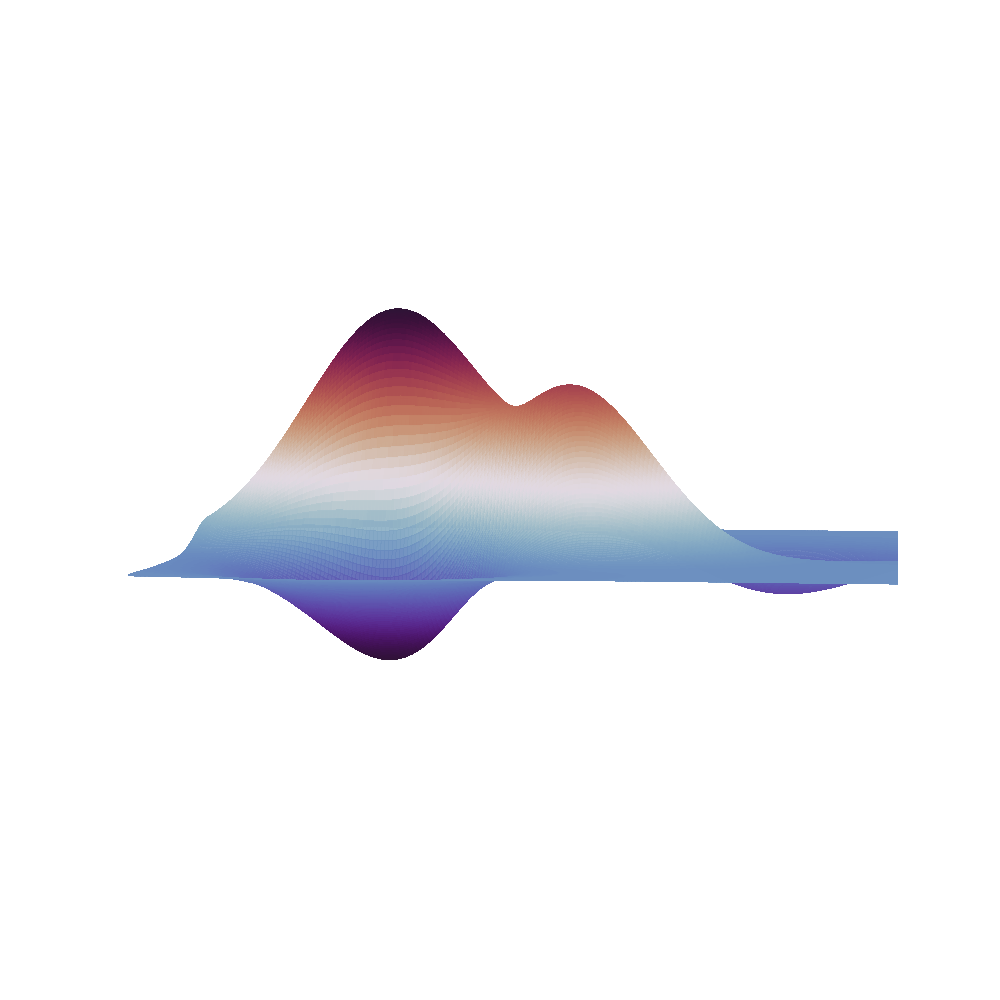

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


# Load the original twilight_shifted colormap
original_cmap = plt.cm.get_cmap('twilight_shifted', 256)
original_colors = original_cmap(np.linspace(0, 1, 256))

# Define a threshold to detect near-white colors and the range for blending
threshold = 2
blend_range = 100  # Number of colors around the near-white to blend

# Process each color in the colormap
for i, color in enumerate(original_colors):
    if all(c > threshold for c in color[:3]):  # If color is near-white
        # Blend this color with colors before and after it within the blend_range
        for j in range(1, blend_range + 1):
            # Blend with previous colors
            if i - j >= 0:
                blend_factor = j / blend_range
                original_colors[i] = original_colors[i] * blend_factor + original_colors[i - j] * (1 - blend_factor)

            # Blend with next colors
            if i + j < len(original_colors):
                blend_factor = j / blend_range
                original_colors[i] = original_colors[i] * blend_factor + original_colors[i + j] * (1 - blend_factor)
        break  # Assume only one segment of near-white colors

# Create a new colormap from the modified colors
new_cmap = LinearSegmentedColormap.from_list("smooth_modified_twilight_shifted", original_colors)

%matplotlib widget
# Grid setup
x = np.linspace(-3, 4, 1000)
y = np.linspace(-3, 3, 1000)
x, y = np.meshgrid(x, y)

# Function definition
z = np.exp(-((x - 1.5)**2 + (y - 1.5)**2)) + 0.99*np.exp(-((x -0.25)**2 + (y -0.25)**2)) - 0.8*np.exp(-((x )**2 + (y -1)**2)) - 0.2*np.exp(-((x -1.5)**2 + (y+1.5 )**2)) - 0.1*np.exp(-((x +1.5)**2 + (y-1.5 )**2))

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_axis_off()
ax.plot_surface(x, y, z, cmap=new_cmap,  edgecolor='none',alpha=0.95,linewidth=0, antialiased=False, rcount=200, ccount=200)

# Setting view angle for better visualization
ax.view_init(4, -173)
ax.set_xlim(-4,1.2)
ax.set_ylim(-1.5,2)


plt.savefig("Saddle.png", transparent=True)
plt.show()


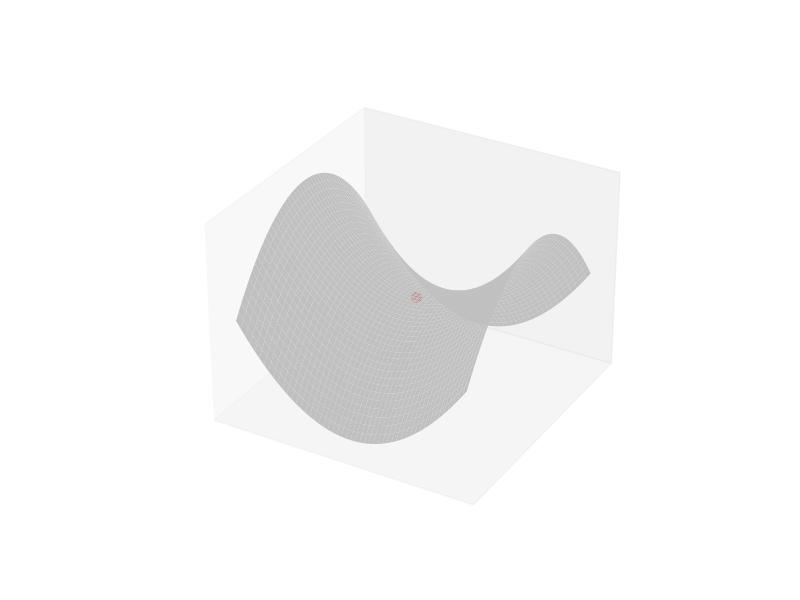

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
x, y = np.meshgrid(x, y)
z = x**2 - y**2

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, edgecolor='none',shade=False, color="silver")

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Hide the spines
ax.w_xaxis.line.set_visible(False)
ax.w_yaxis.line.set_visible(False)
ax.w_zaxis.line.set_visible(False)



# Saddle point annotation
ax.scatter(0, 0, 0, color='red', s=50)  # Saddle point at origin
#ax.set_axis_off()
plt.savefig("Saddle.png", transparent=True)

plt.show()


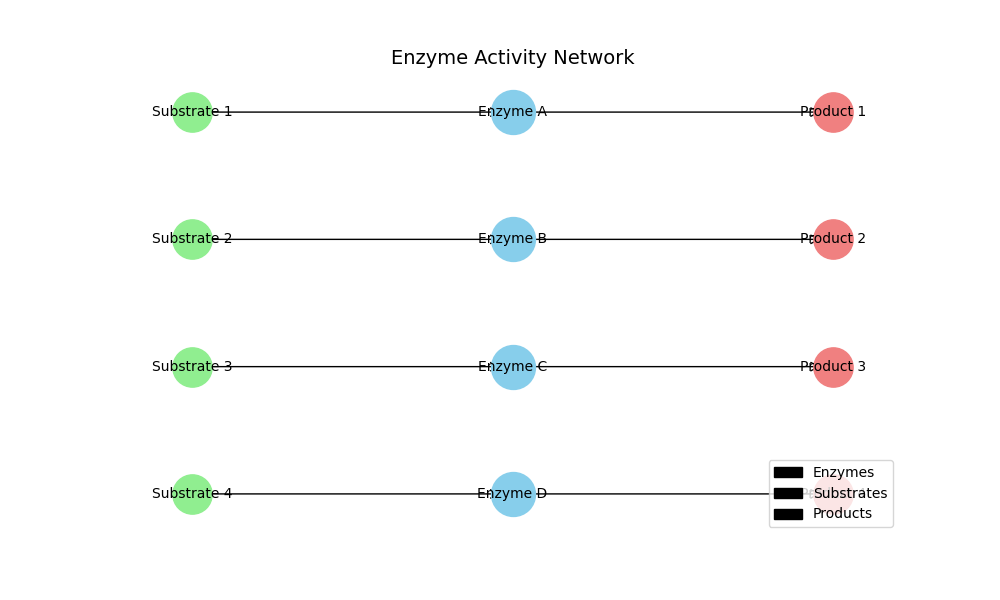

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a network graph
G = nx.DiGraph()

# Add enzymes as nodes and substrate-product relationships as edges
enzymes = ["Enzyme A", "Enzyme B", "Enzyme C", "Enzyme D"]
substrates = ["Substrate 1", "Substrate 2", "Substrate 3", "Substrate 4"]
products = ["Product 1", "Product 2", "Product 3", "Product 4"]

# Adding edges for reactions
for i in range(len(enzymes)):
    G.add_edge(substrates[i], enzymes[i])
    G.add_edge(enzymes[i], products[i])

# Define positions
pos = {
    "Substrate 1": (0, 2),
    "Substrate 2": (0, 1),
    "Substrate 3": (0, 0),
    "Substrate 4": (0, -1),
    "Enzyme A": (1, 2),
    "Enzyme B": (1, 1),
    "Enzyme C": (1, 0),
    "Enzyme D": (1, -1),
    "Product 1": (2, 2),
    "Product 2": (2, 1),
    "Product 3": (2, 0),
    "Product 4": (2, -1),
}

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=15, edge_color="black")
nx.draw_networkx_nodes(G, pos, nodelist=enzymes, node_color="skyblue", node_size=1000, label="Enzymes")
nx.draw_networkx_nodes(G, pos, nodelist=substrates, node_color="lightgreen", node_size=800, label="Substrates")
nx.draw_networkx_nodes(G, pos, nodelist=products, node_color="lightcoral", node_size=800, label="Products")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Add title and legend
plt.title("Enzyme Activity Network", fontsize=14)
plt.legend(["Enzymes", "Substrates", "Products"], loc="lower right", fontsize=10)
plt.axis("off")
plt.show()